## Global mean temperature
Global warming
Data server catalog for all NOAA data: https://psl.noaa.gov/thredds/catalog/catalog.html

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

Anomaly relative to 1951–1980 average

In [2]:
filename="http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/gistemp/combined/250km/air.2x2.250.mon.anom.comb.nc"
with xr.open_dataset(filename) as ds:
#    print(ds)
    temp=ds.air.sel(time=slice('1979', '2024'))
temp

<xarray.DataArray 'air' (time: 550, lat: 90, lon: 180)>
[8910000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.0 87.0 85.0 83.0 81.0 ... -83.0 -85.0 -87.0 -89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2024-10-01
Attributes: (12/14)
    long_name:      Monthly Average Temperature Anomalies
    valid_range:    [-25.  25.]
    units:          degC
    precision:      2
    var_desc:       Air Temperature: 250km smoothing combined
    dataset:        GISS Surface Temperature Analysis (GISTEMP)
    ...             ...
    parent_stat:    Individual obs
    cell_methods:   time: anomaly (monthly from values)
    standard_name:  air_temperature_anomaly
    comments:       ERSST V5 used for SST (starting Oct 25 2017 at PSD) from ...
    actual_range:   [-19.89452  19.78792]
    _ChunkSizes:    [  1  90 180]

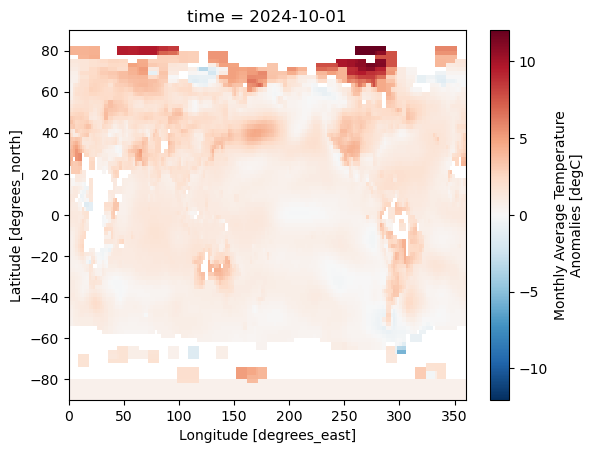

In [3]:
temp.isel(time=-1).plot()

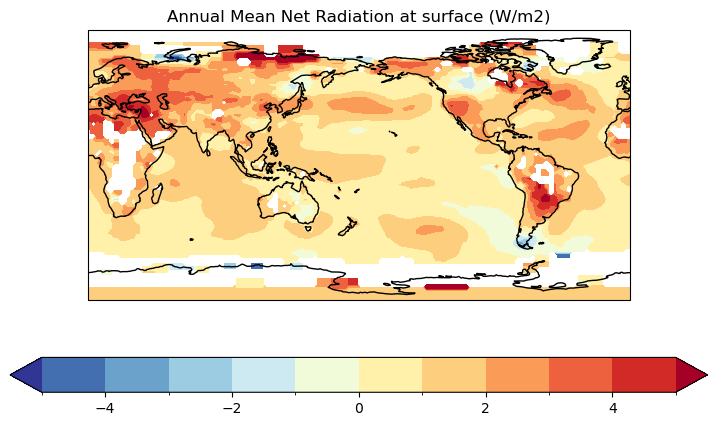

In [4]:
# Make a prettier plot
lev1=np.arange(-5,6,1)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.RdYlBu_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=temp.isel(time=-5).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=lev1,cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('Annual Mean Net Radiation at surface (W/m2)')
fig1.colorbar(cs, orientation='horizontal') # color map

### Exercise 1
Create temperature anomaly map for 2023.

## Creating weights

For a rectangular grid the cosine of the latitude is proportional to the grid cell area.

In [5]:
weights = np.cos(np.deg2rad(temp.lat))
weights.name = "weights"

In [10]:
# Weighted mean
temp_w = temp.weighted(weights)
temp_avg = temp_w.mean(("lon", "lat"))

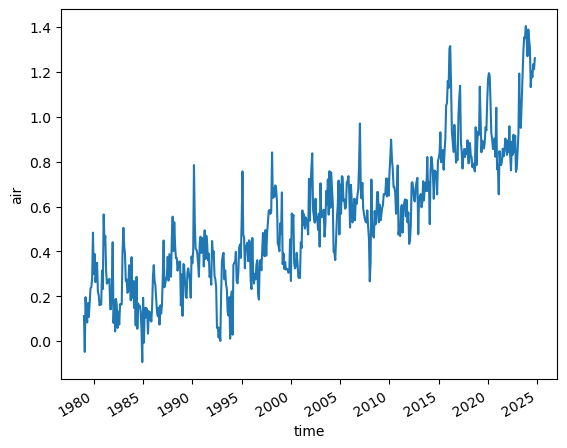

In [11]:
temp_avg.plot()

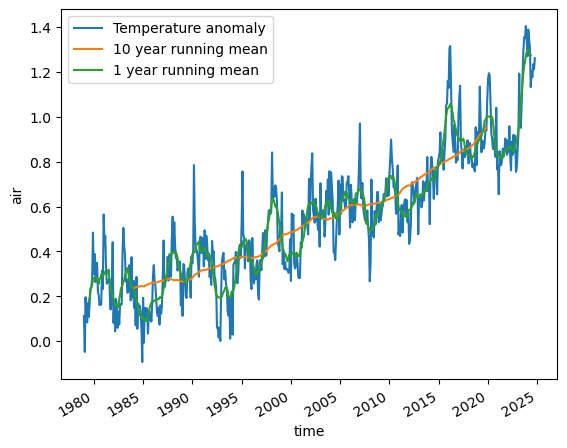

In [8]:
temp_avg.plot(label="Temperature anomaly")
t_roll_avg = temp_avg.rolling(time=120, center=True).mean() # 10 year running mean
t_roll_avg.plot(label='10 year running mean')
t_roll_avg2 = temp_avg.rolling(time=12, center=True).mean() # 1 year running mean
t_roll_avg2.plot(label='1 year running mean')
plt.legend()

### Exercise 2
Below I plotted global average mean of 1979. Add similar plots for 1990 and 2023.

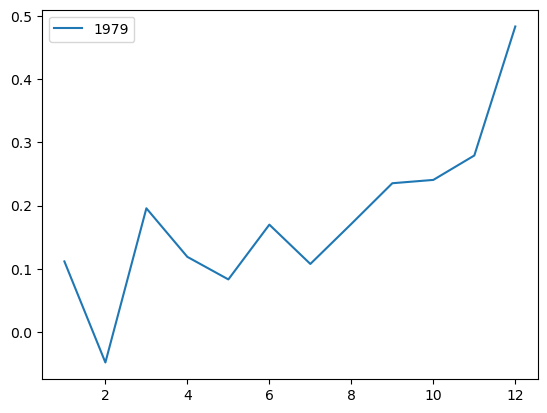

In [9]:
month=np.arange(1,13)
plt.plot(month,temp_avg.sel(time=slice('1979', '1979')),label='1979')
plt.legend()